This is a simple snapshot that demonstrates a Jupyter Lab Environment successfully integrated with an active Google Cloud Project. I was provided with this code template from Boston College, so this is mostly *not* original code. This script was run from my individual account on the online BC JupyterHub.

In [1]:
import os
import io
import json

from IPython.display import Image
from google.cloud import vision # Trying out the Vision API from Google


Setting path to key.json as GOOGLE_APPLICATION_CREDENTIALS environment variable

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.abspath("/home/jupyter-cusickd/.config/gcloud/application_default_credentials.json")

In [3]:
# Extract and display Google Project ID
with open('/home/jupyter-cusickd/.config/gcloud/application_default_credentials.json') as f:
    credentials = json.load(f)
quota_project_id = credentials.get('quota_project_id')
print("My Google Cloud Project ID:", quota_project_id)

My Google Cloud Project ID: dsjungle-415123


I am trying this out with a picture of a cheetah I took at the San Diego Zoo in August 2019.  It's not the clearest picture, but a human could certainly identify the animal as a cheetah, leopard, etc.

In [4]:
vision_client = vision.ImageAnnotatorClient()

In [5]:
img_path = './cheetah.JPG'

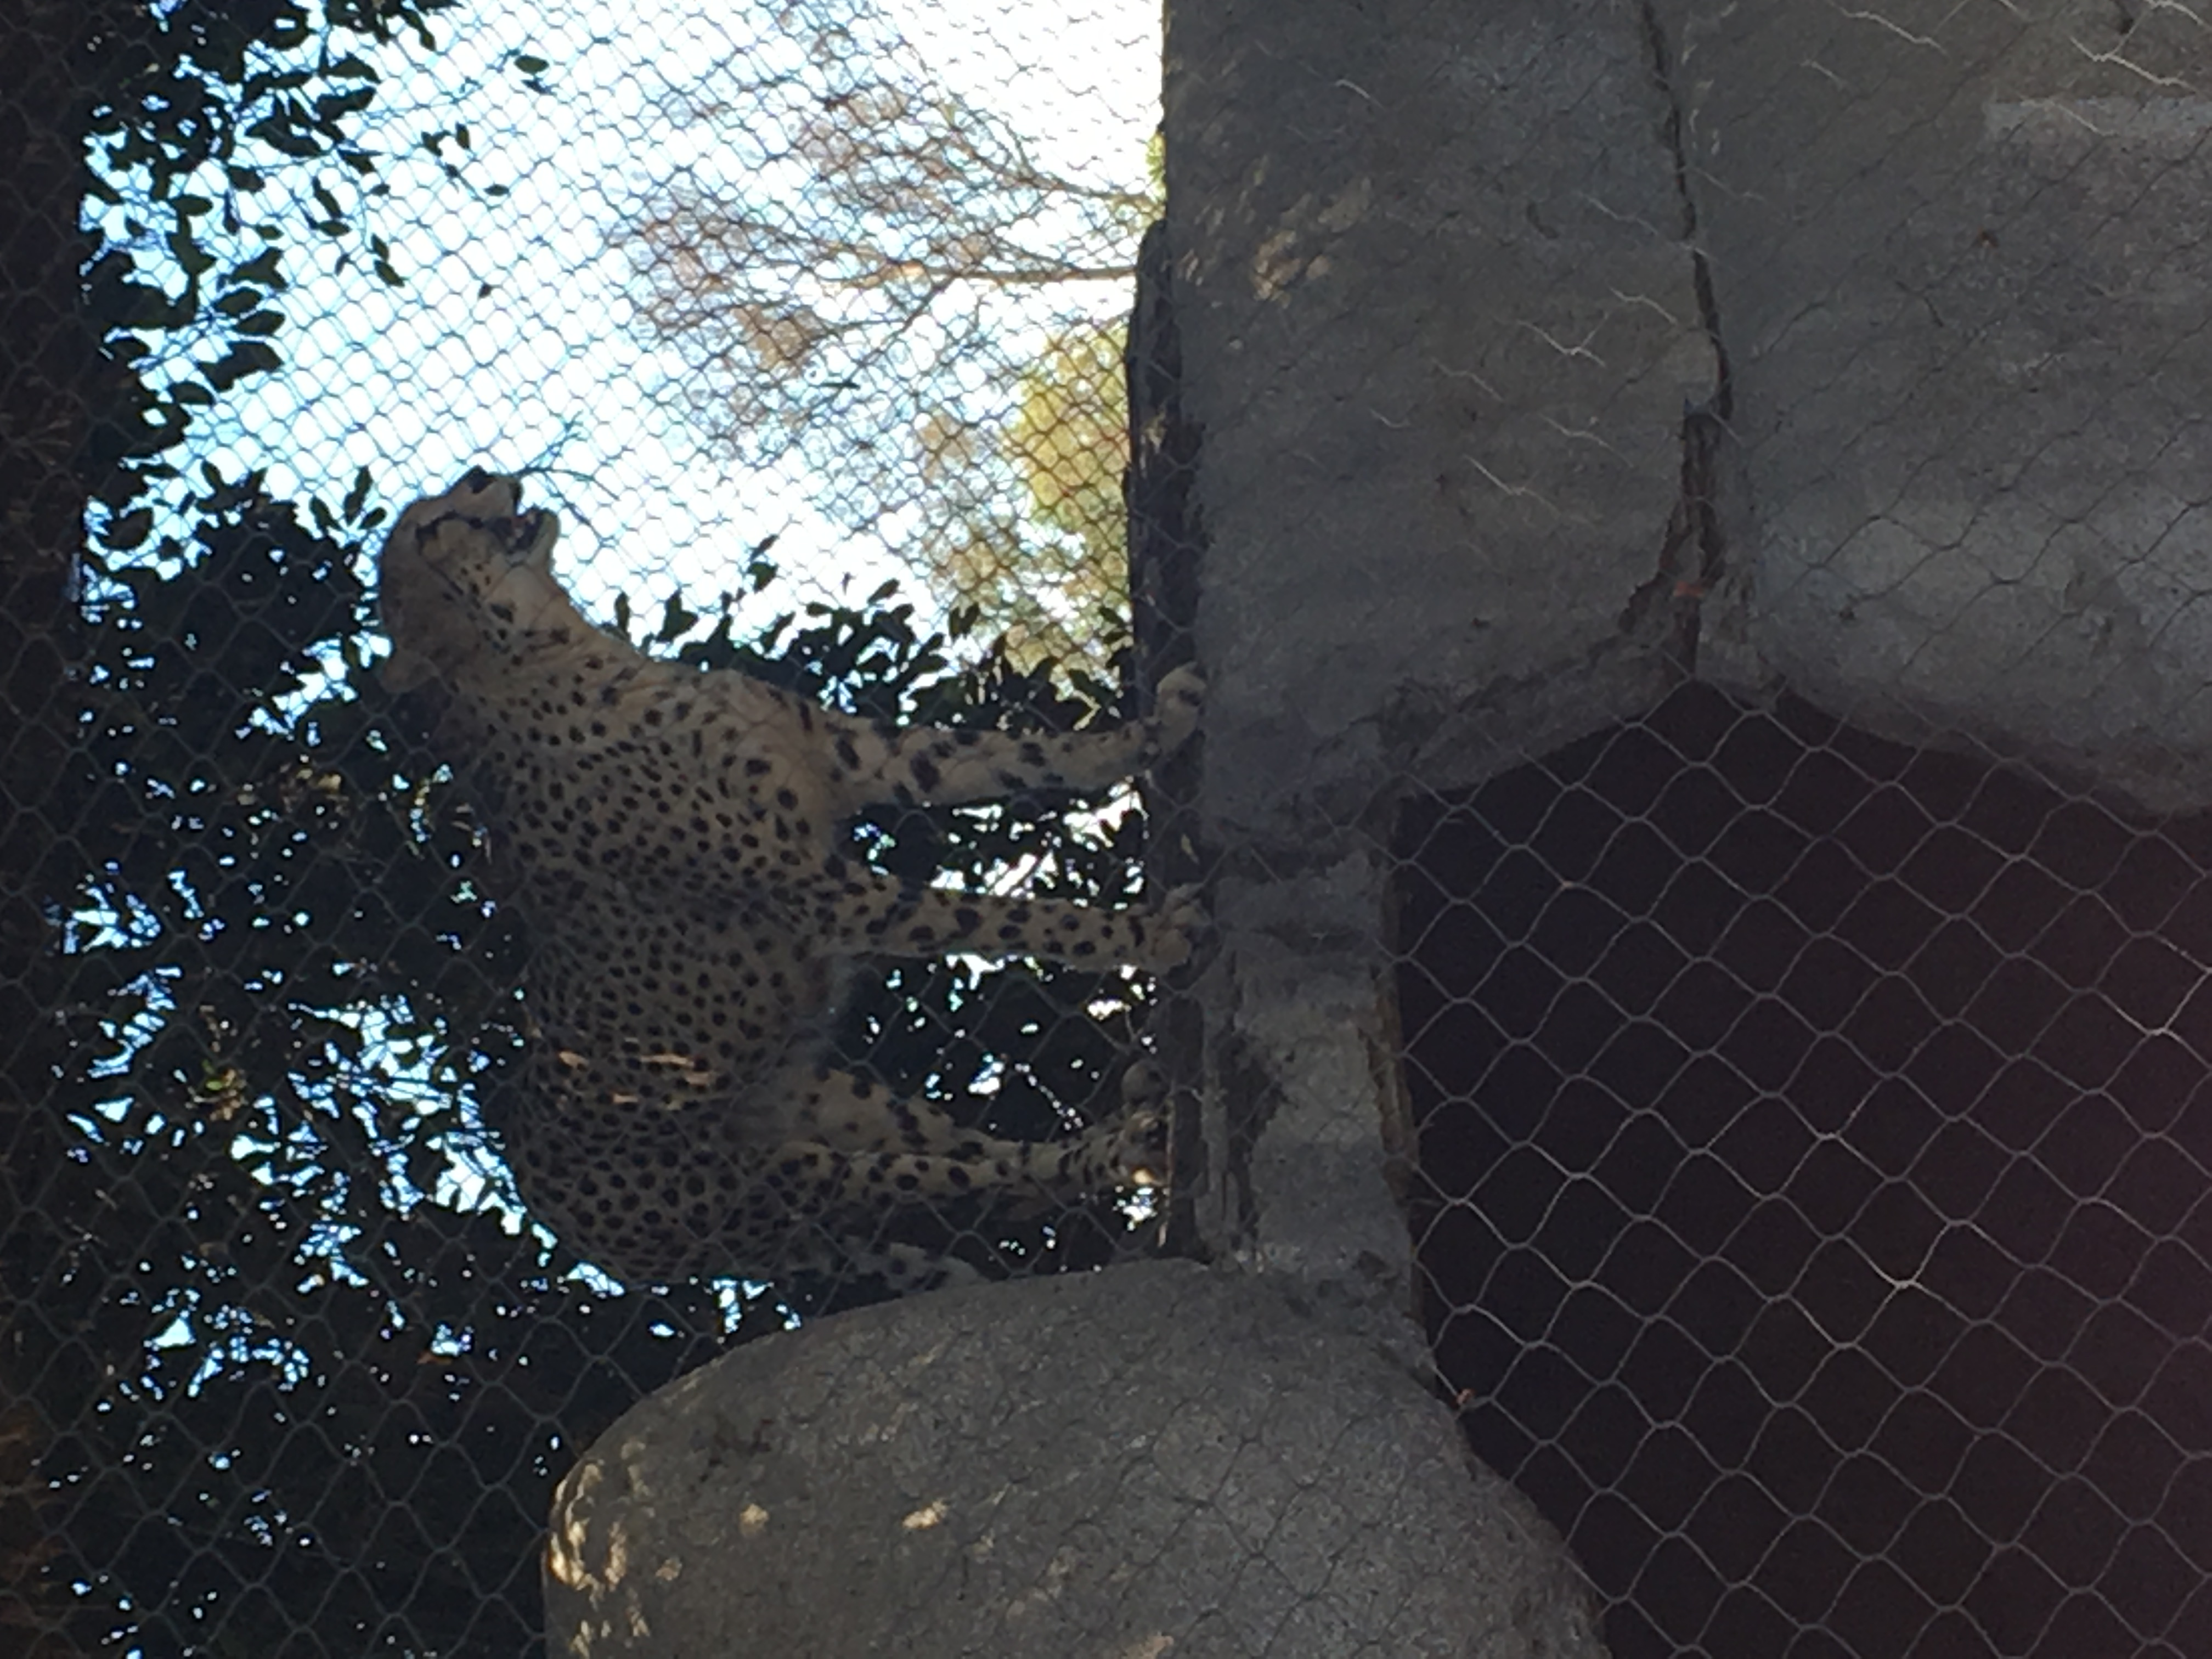

In [6]:
Image(filename=img_path, width=400, height=400) 

In [7]:
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()
        
image_object = vision.Image(content=content)

In [8]:
# Send a request to cloud vision api client to detect labels in input image
response = vision_client.label_detection(image=image_object)

I was curious how well the API would identify the cheetah. Looks like the cheetah was mainly picked up with the "Pattern" and "Terrestrial animal" labels.

In [9]:
# Responses by Confidence Level
for responses in response.label_annotations:
    print(f"Label: {responses.description}, Confidence: {responses.score}")

Label: Tree, Confidence: 0.8140082359313965
Label: Tints and shades, Confidence: 0.7740480899810791
Label: Mesh, Confidence: 0.7521597146987915
Label: Twig, Confidence: 0.7438827157020569
Label: Sky, Confidence: 0.7420796751976013
Label: Grass, Confidence: 0.7405715584754944
Label: Pattern, Confidence: 0.7281326651573181
Label: Art, Confidence: 0.7183119058609009
Label: Landscape, Confidence: 0.7137854099273682
Label: Terrestrial animal, Confidence: 0.7113997936248779


In [10]:
# Raw Response
response

label_annotations {
  mid: "/m/07j7r"
  description: "Tree"
  score: 0.814008236
  topicality: 0.814008236
}
label_annotations {
  mid: "/m/02q_bfg"
  description: "Tints and shades"
  score: 0.77404809
  topicality: 0.77404809
}
label_annotations {
  mid: "/m/0413y3"
  description: "Mesh"
  score: 0.752159715
  topicality: 0.752159715
}
label_annotations {
  mid: "/m/016nqt"
  description: "Twig"
  score: 0.743882716
  topicality: 0.743882716
}
label_annotations {
  mid: "/m/01bqvp"
  description: "Sky"
  score: 0.742079675
  topicality: 0.742079675
}
label_annotations {
  mid: "/m/08t9c_"
  description: "Grass"
  score: 0.740571558
  topicality: 0.740571558
}
label_annotations {
  mid: "/m/0hwky"
  description: "Pattern"
  score: 0.728132665
  topicality: 0.728132665
}
label_annotations {
  mid: "/m/0jjw"
  description: "Art"
  score: 0.718311906
  topicality: 0.718311906
}
label_annotations {
  mid: "/m/025s3q0"
  description: "Landscape"
  score: 0.71378541
  topicality: 0.71378541